<a href="https://colab.research.google.com/github/shahab460/AI-ML-with-Python/blob/main/SVM_Linear_Kernel_Primal_Formulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***The code below implements Support Vector Machine (SVM) classifier in the Primal Formulation using Linear Kernel.***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

Read the dataset using Pandas dataframe as follows

In [4]:
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

In [5]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Define the first 4 columns as independent variable $X$, and the last column (5th column) as target variable $y$

In [6]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

Split the 70% of data as training data, and keep 30% of data as test data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Now perform the feature scaling / normalization

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Now train the model with SVM Linear Kernel Primal Form as follows

In [11]:
#import support vector classifier
from sklearn.svm import SVC

clf = SVC(kernel='linear')

#fitting X samples and y classes
clf.fit(X_train, y_train)

SVC(kernel='linear')

Now that classifier fitment is done based on training data, we can predict y for test dataset (and then compare with actual y values)

In [12]:
y_pred = clf.predict(X_test)

We may print basic results as follows

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cnfsn_matrix = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n", cnfsn_matrix)

clsfcn_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", clsfcn_report)

accrcy_score = accuracy_score(y_test, y_pred)
print("Accuracy:", accrcy_score)

confusion matrix:
 [[17  0  0]
 [ 0 11  1]
 [ 0  0 16]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


Let's display the confusion matrix graphically using seaborn

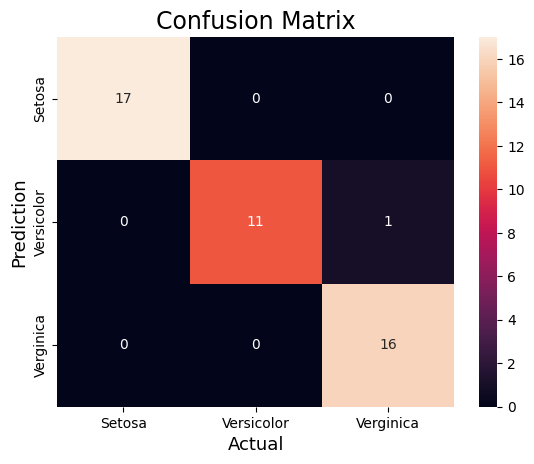

In [15]:
sns.heatmap(cnfsn_matrix,
            annot=True,
            fmt='g',
            xticklabels=['Setosa', 'Versicolor', 'Verginica'],
            yticklabels=['Setosa', 'Versicolor', 'Verginica'])

plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

***The accuracy score achieved by SVM Linear Kernel Primal Form is approx 98%***